# 🦀 Breast Cancer Prediction Using Machine Learning.

<center><img src="https://healthitanalytics.com/images/site/article_headers/_normal/ThinkstockPhotos-495951912.jpg" alt="Breast Cancer Prediction Using Machine Learning" height="70%" width="100%" /></center>

### Attribute Information:

1. ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

After installing numpy and pandas package, we are ready to fetch data using pandas package, Befor we use it, We need to know where's our dataset located. Means what is the path of our dataset

<a id="1"></a><br>

# 1. Data Collection.

In [2]:
data = pd.read_csv("C://Users/DEBAPRIYA SASMAL/Downloads/ML_Proj/ML_Proj/ML.csv")#you can use your own path here

After collecting data, we need to know what are the shape of this dataset.



In [3]:
# Show how many indexes and columns are in the dataset

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#Show first 8 records from the dataset 

data.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


<a id="2"></a><br>
# 2. Exploring Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isna() #to show if there is any null values or not 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [8]:
data.isna().sum() #to give the sum of exisying null values in each column

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#If in the above information , there are any null values exist in any column , remove it and then show the column names after modifying

In [10]:

#Line 1: remove null value added column
data.drop("Unnamed: 32",axis=1,inplace=True)
#Line 2: Show the columns after modifying 
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
#Drop any unnecessary column , if it is there ..not required for data analysis.
data.drop("id",axis=1,inplace=True)

### Get object features

- Using this method, we can see how many `object(categorical)` type of feature exists in dataset

In [12]:
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


- *As we can see abouve result there are only one single feature is categorical and it's values are `B` and `M`*

### To know how many unique values

In [13]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

 using  `value_counts` method we can see number of unique values in categorical type of feature.

### Identify dependent and independent

In [14]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [15]:
diagnosis_unique = data.diagnosis.unique()

In [16]:
diagnosis_unique

array(['M', 'B'], dtype=object)

<a id="3"></a><br>

# 3. Data Visualization.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style('darkgrid')

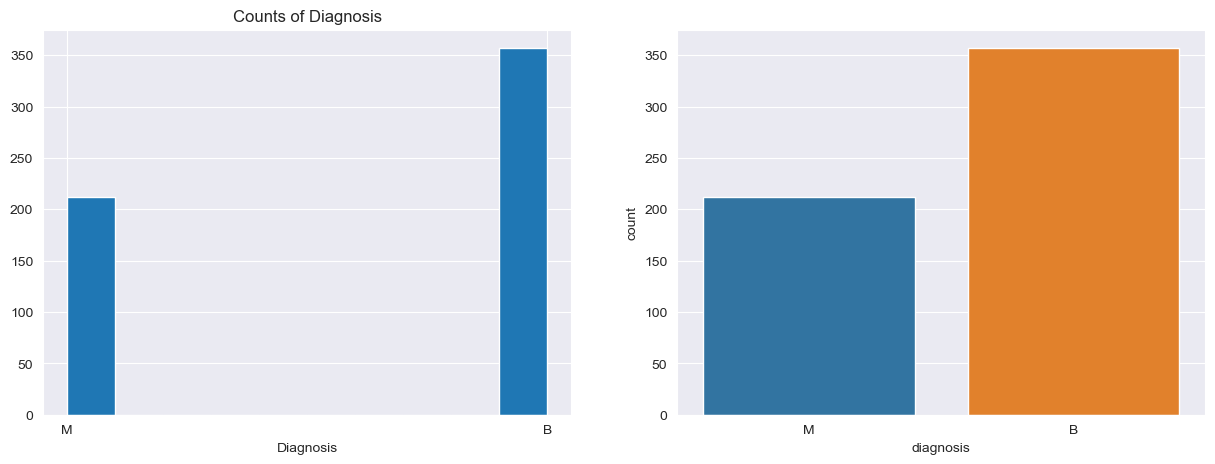

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( data.diagnosis)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")


plt.subplot(1, 2, 2)

sns.countplot(x='diagnosis', data=data); # ";" to remove output like this > <matplotlib.axes._subplots.AxesSubplot at 0x7f3a1dddba50>

plt.show() 

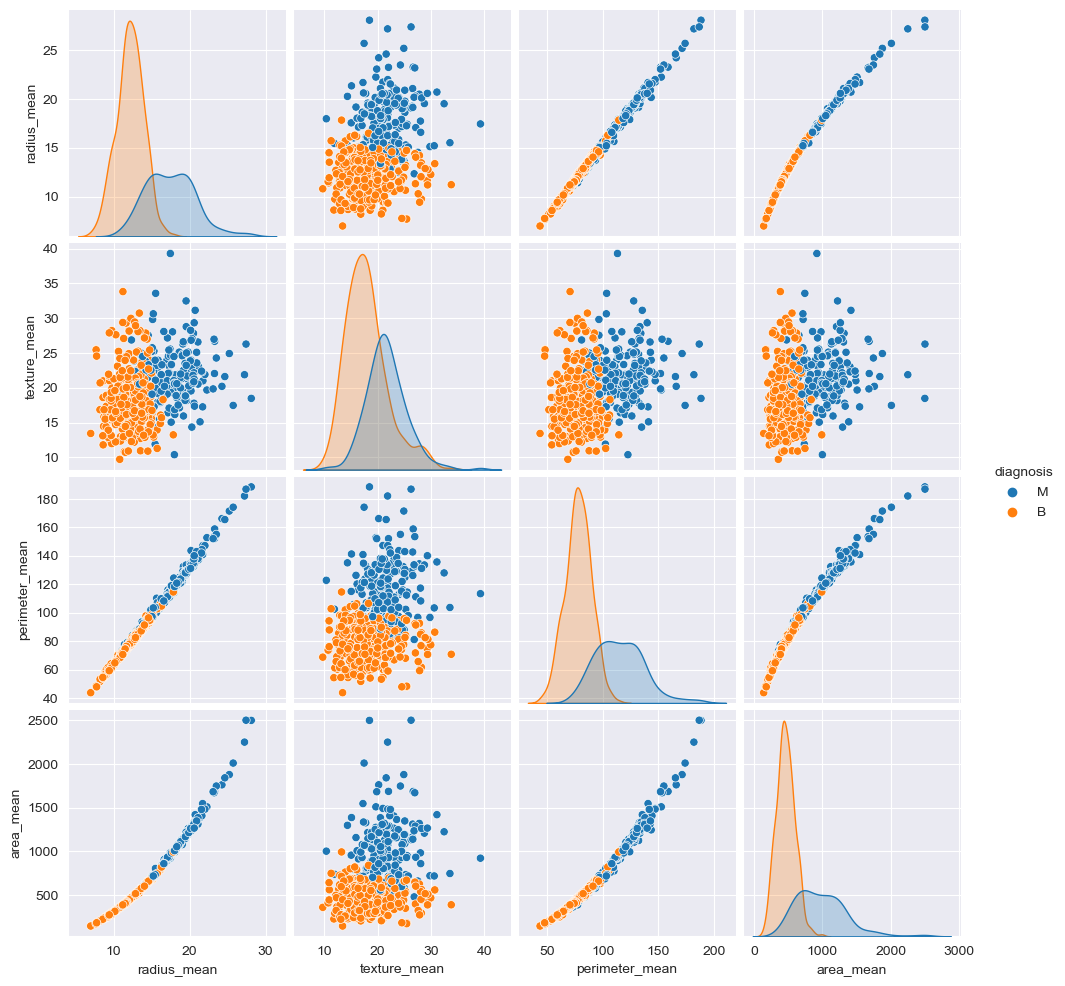

In [19]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

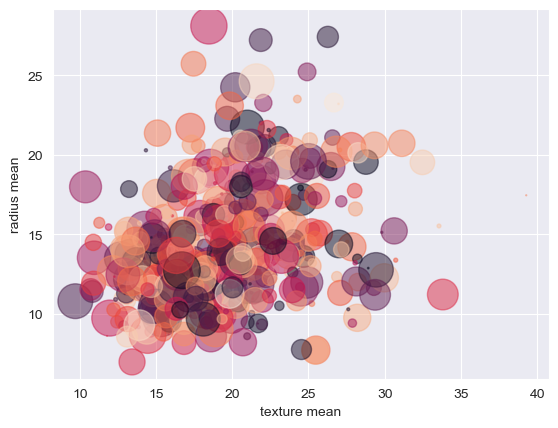

In [20]:
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5);

### Data Filtering


- Now, we have one categorical feature, so we need to convert it into numeric values 

In [29]:
#Convert the categorical values of diagnosis column into integer values
data['diagnosis'].replace(['M','B'],[1,0],inplace=True)

After converting into numerical values, we can check it's values using this way, 

In [30]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [31]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

0    357
1    212
Name: diagnosis, dtype: int64

 569


Finally, We can see in this output categorical values converted into 0 and 1.

#### Find the correlation between other features, mean features only

In [32]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
#Find the corrlelation 
data[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


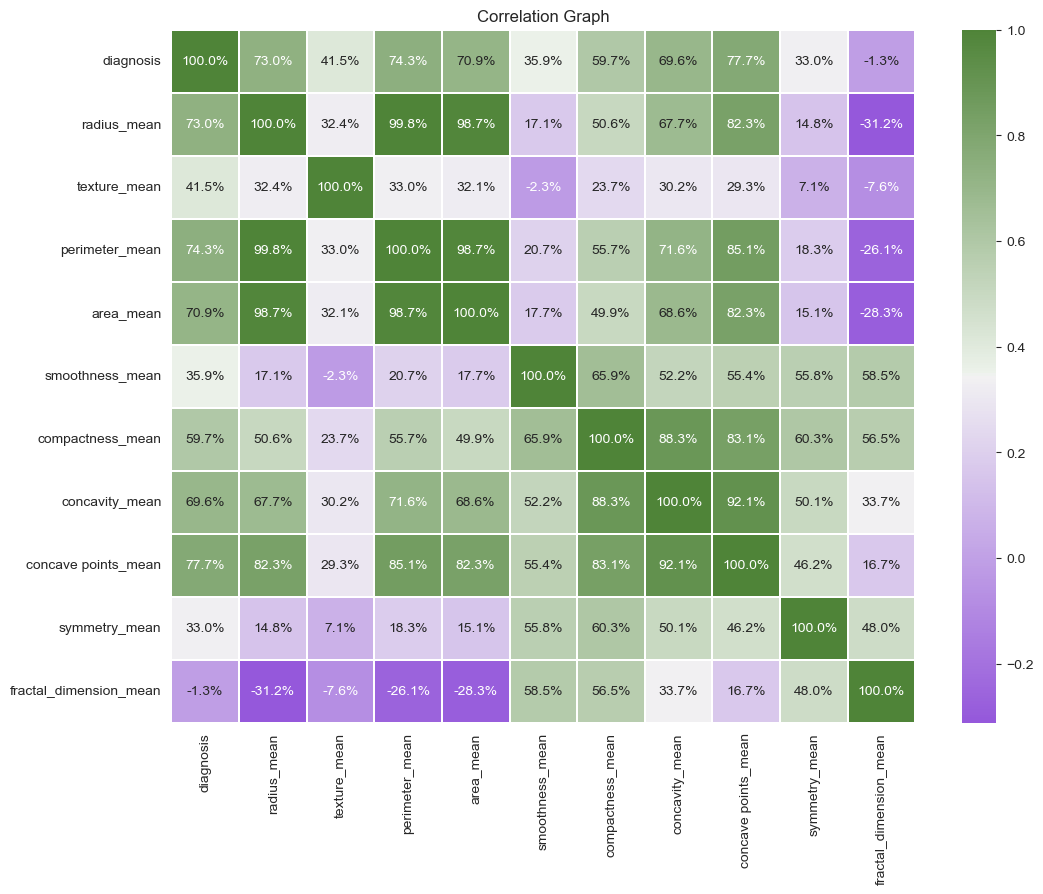

In [33]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

Using, Plotly Pacage we can show it in interactive graphs like this,

<a id="4"></a><br>

# Model Implementation

---
---


#### Train Test Splitting


##### Preprocessing and model selection


In [34]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


### Import Machine Learning Models


In [35]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier


### Check the Model Accuracy, Errors and it's Validations

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

### Feature Selection

Select feature for predictions

In [37]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

- Take the dependent and independent feature for prediction

### Ex. 6

In [39]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

#Write the target variable we need to take for this analysis 

targeted_feature = ["diagnosis"] 

len(prediction_feature)

6

In [40]:
X = data[prediction_feature]
X


,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [41]:


y = data[targeted_feature] #[hint: the target variable column should be assigned here]
y  

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


- Split the dataset , Training Size will be 75%

In [44]:
#X_train, X_test, y_train, y_test
train,test=train_test_split(data, test_size = 0.25)
X_train=train[prediction_feature]
y_train=train[targeted_feature]
X_test=test[prediction_feature]
y_test=test[targeted_feature]


### Perform Feature Standerd Scalling

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

- z = (x - u) / s

In [45]:
# Scale the data to keep all the values in the same magnitude of 0 -1 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


<a id="5"></a><br>
# ML Model Selecting and Model PredPrediction



---
---

#### Model Building

Now, we are ready to build our model for prediction, for the I made function for model building and preforming prediction and measure it's prediction and accuracy score.

####  Arguments 
1. model => ML Model Object
2. Feature Training Set data 
3. Feature Testing Set data
4. Targetd Training Set data 
5. Targetd Testing Set data

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 6) (426, 1)
(143, 6) (143, 1)


In [47]:
accu = []
prec = []
recc = []
f1   = []
models =[]

### Decision Tree

In [48]:
dtree_model = DecisionTreeClassifier(max_depth = 100)
pred=dtree_model.fit(X_train, y_train)
dt_pred = dtree_model.predict(X_test)

In [49]:
accuracy_score(y_test, dt_pred)

0.8741258741258742

In [50]:
print('Accuracy Score : ' + str(accuracy_score(y_test, dt_pred)))
print('Precision Score : ' + str(precision_score(y_test,dt_pred,average='macro')))
print('Recall Score : ' + str(recall_score(y_test,dt_pred,average='macro')))
print('F1 Score : ' + str(f1_score(y_test,dt_pred,average='macro')))

Accuracy Score : 0.8741258741258742
Precision Score : 0.853937168502652
Recall Score : 0.8845301418439716
F1 Score : 0.864010989010989


##### above classifier analysis is fully coded for your example

In [51]:
accu.append(accuracy_score(y_test, dt_pred))
prec.append(precision_score(y_test,dt_pred,average='macro'))
recc.append(recall_score(y_test,dt_pred,average='macro'))
f1.append(f1_score(y_test,dt_pred,average='macro'))
models.append("Decision Tree" )

## Logistics Regression

In [52]:
#Using the above steps, fit the Training datas in this classifier 

In [53]:
#complete the code and uncomment the below lilnes before run

clf = LogisticRegression(random_state=100) #"Call The classifier"
pred=clf.fit(X_train,y_train)#Fit the model
lr_pred =clf.predict(X_test) #assign the predicted data we will get by using X_Test



In [54]:
print('Accuracy Score : ' + str(accuracy_score(y_test, lr_pred)))
print('Precision Score : ' + str(precision_score(y_test,lr_pred,average='macro')))
print('Recall Score : ' + str(recall_score(y_test,lr_pred,average='macro')))
print('F1 Score : ' + str(f1_score(y_test,lr_pred,average='macro')))

Accuracy Score : 0.9090909090909091
Precision Score : 0.8955043859649123
Recall Score : 0.8997118794326242
F1 Score : 0.8975475337558556


###### Accuracy should be near 90%

In [55]:
accu.append(accuracy_score(y_test, lr_pred))
prec.append(precision_score(y_test,lr_pred,average='macro'))
recc.append(recall_score(y_test,lr_pred,average='macro'))
f1.append(f1_score(y_test,lr_pred,average='macro'))
models.append("Logistic Regression" )

## Random Forest

In [56]:
#complete the code and uncomment the below lilnes before run

RF =RandomForestClassifier(n_estimators=100) #"Call The classifier"
pred=RF.fit(X_train,y_train)#Fit the model
rf_pred = RF.predict(X_test)#assign the predicted data we will get by using X_Test




#total 3 lines of code

In [57]:
#Only predict Accuracy Score
metrics.accuracy_score(rf_pred,y_test)



0.9370629370629371

##### Accuracy should be near 90%

In [58]:
print('Precision Score : ' + str(precision_score(y_test,rf_pred,average='macro')))
print('Recall Score : ' + str(recall_score(y_test,rf_pred,average='macro')))
print('F1 Score : ' + str(f1_score(y_test,rf_pred,average='macro')))

Precision Score : 0.9238709677419354
Recall Score : 0.9368351063829787
F1 Score : 0.9297987236131566


In [59]:
accu.append(accuracy_score(y_test, rf_pred))
prec.append(precision_score(y_test,rf_pred,average='macro'))
recc.append(recall_score(y_test,rf_pred,average='macro'))
f1.append(f1_score(y_test,rf_pred,average='macro'))
models.append("Random forrest" )

### Overall Summary of Accuracy Score

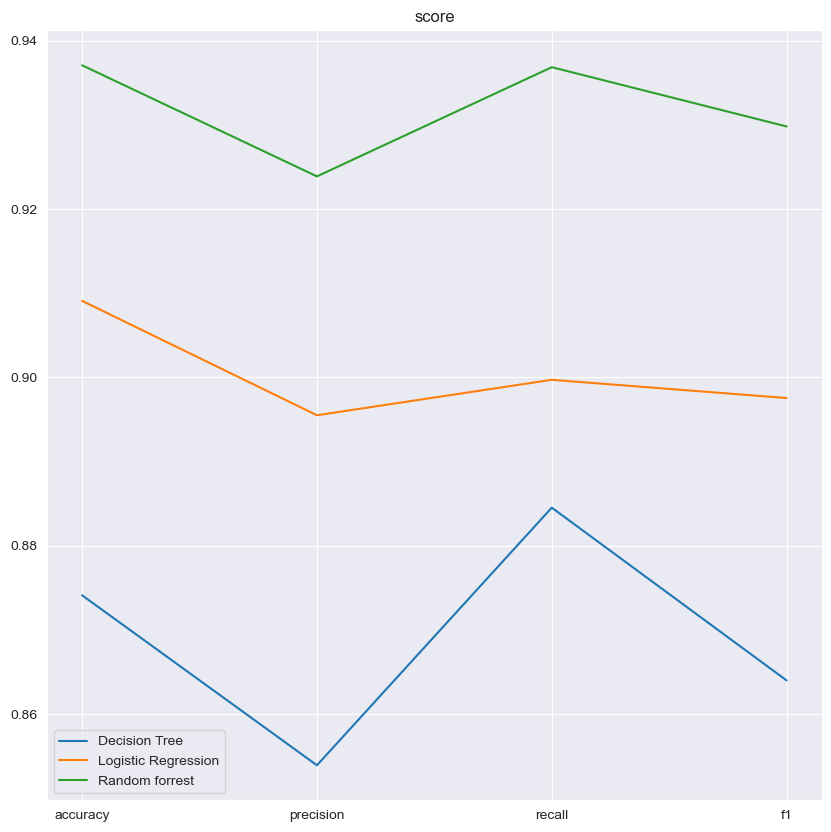

In [60]:
x = ['accuracy','precision','recall','f1']
plt.figure(figsize=(10,10))
plt.title('score')
# plot lines
for i in range(len(accu)):
    plt.plot(x,[accu[i],prec[i],recc[i],f1[i]], label = models[i])
plt.legend()
plt.savefig('curves.png')
plt.show()

### Final Result data save

In [61]:
results1 = pd.DataFrame({'model':models,'accuracy':accu,'precision':prec,'recall':recc,'f1 score' :f1})

- print the hightest accuracy score using sort values

In [62]:
results1.sort_values('accuracy', ascending=False)

,model,accuracy,precision,recall,f1 score
2,Random forrest,0.937063,0.923871,0.936835,0.929799
1,Logistic Regression,0.909091,0.895504,0.899712,0.897548
0,Decision Tree,0.874126,0.853937,0.884530,0.864011


In [63]:
#Convering the dataframe into csv
results1.to_csv('results1.csv')

In [64]:
results1

,model,accuracy,precision,recall,f1 score
0,Decision Tree,0.874126,0.853937,0.884530,0.864011
1,Logistic Regression,0.909091,0.895504,0.899712,0.897548
2,Random forrest,0.937063,0.923871,0.936835,0.929799


### Conclusion

- In this kernal, We had seen the data clearning and EDA using pandas methods and show some visual graphs to know the behaviour of this dataset and finnaly we train some model for it and calculate the prediction and it's accuracy scores . I have wrote some basic codes in this notebook. So, After socessfully completed we can deploy our models to the live production mode using **exporting models and some python web applications.** For that we can use `Flask`, `Django` or `FastAPI` frameworks.